In [1]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt

In [14]:
#suffix = '1H_20180501_20201101'
#suffix = '3H_20180501_20201101'
suffix = '1W_20180501_20201101'
df = pd.read_csv('../data/kaiterra/kaiterra_fieldeggid_{}_panel.csv'.format(suffix), index_col=[0,1], parse_dates=True)

In [15]:
df.sort_index(inplace=True)
df

pm25  pm10
field_egg_id timestamp_round                      
113E         2018-04-30 00:00:00+05:30   NaN   NaN
             2018-05-07 00:00:00+05:30   NaN   NaN
             2018-05-14 00:00:00+05:30   NaN   NaN
             2018-05-21 00:00:00+05:30   NaN   NaN
             2018-05-28 00:00:00+05:30   NaN   NaN
...                                      ...   ...
EAC8         2020-09-28 00:00:00+05:30   NaN   NaN
             2020-10-05 00:00:00+05:30   NaN   NaN
             2020-10-12 00:00:00+05:30   NaN   NaN
             2020-10-19 00:00:00+05:30   NaN   NaN
             2020-10-26 00:00:00+05:30   NaN   NaN

[3668 rows x 2 columns]

In [4]:
locs_df = pd.read_csv('../data/kaiterra/kaiterra_locations.csv', index_col=0)

In [5]:
sensor = 'pm25'

/home/shivar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/shivar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/shivar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/shivar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/shivar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/shivar/anacond

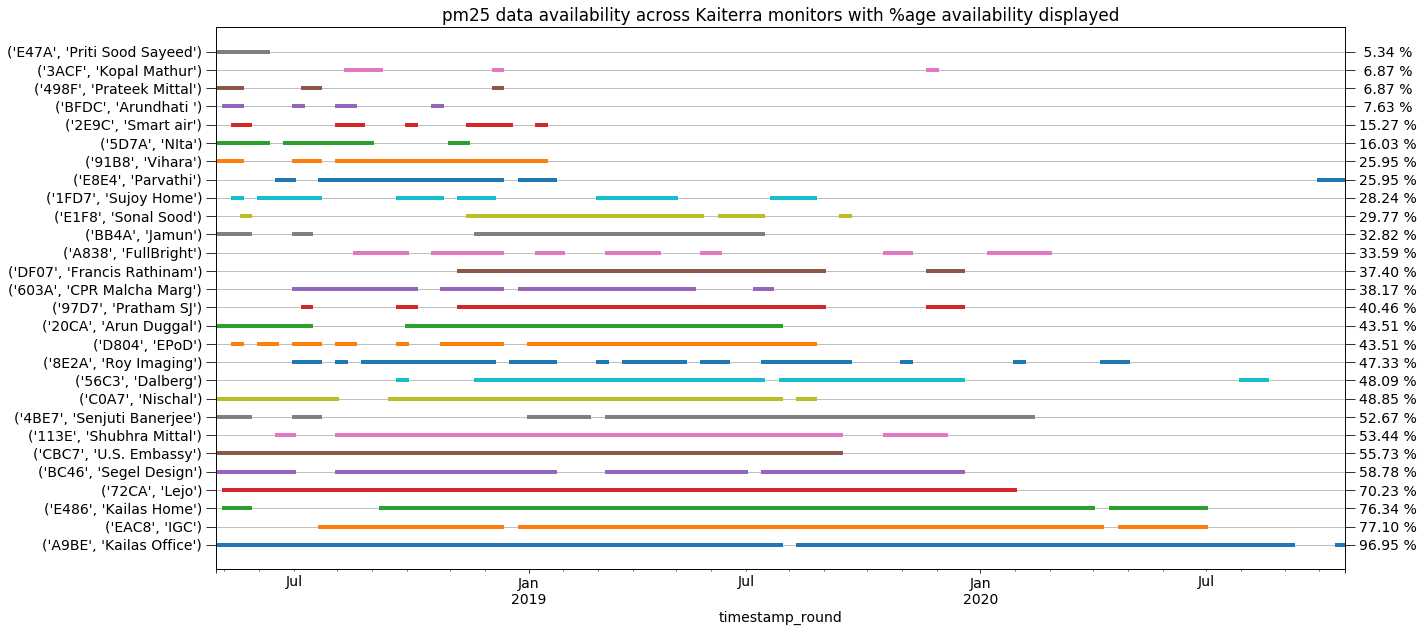

In [16]:
# display availability based on percent counts
grouped = df.groupby(level=0)
validfracs = (grouped[sensor].count() / grouped[sensor].size())
validfracs.sort_values(ascending=False, inplace=True)

plt.rc('font', size=14)

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111)

for count, name in enumerate(validfracs.index, 1):
    # plot the data availability
    group = grouped.get_group(name)
    group.reset_index(level=0, drop=True, inplace=True)
    group[sensor].where(np.isnan(group[sensor]), other=count).plot(lw=4)

ax.set_yticks(np.arange(1,count+1))
#ax.set_yticklabels([(name, grouped.get_group(name).location[0]) for name in validfracs.index])
ax.set_yticklabels([(name, locs_df.Location[name]) for name in validfracs.index])
ax.tick_params(axis='y', right=0, left=1, length=10)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(['{:5.2f} %'.format(val*100) for val in validfracs])
ax2.tick_params(axis='y', right=1, left=0, length=10)
ax.set_title('{} data availability across Kaiterra monitors with %age availability displayed'.format(sensor))
ax.grid(axis='y')
fig.tight_layout()
plt.show()

In [17]:
validfracs

field_egg_id
A9BE    0.969466
EAC8    0.770992
E486    0.763359
72CA    0.702290
BC46    0.587786
CBC7    0.557252
113E    0.534351
4BE7    0.526718
C0A7    0.488550
56C3    0.480916
8E2A    0.473282
D804    0.435115
20CA    0.435115
97D7    0.404580
603A    0.381679
DF07    0.374046
A838    0.335878
BB4A    0.328244
E1F8    0.297710
1FD7    0.282443
E8E4    0.259542
91B8    0.259542
5D7A    0.160305
2E9C    0.152672
BFDC    0.076336
498F    0.068702
3ACF    0.068702
E47A    0.053435
Name: pm25, dtype: float64

In [18]:
#fig.savefig('data/datagaps_kaiterra_fieldeggs_{}_long.png'.format(suffix))
#fig.savefig('data/datagaps_kaiterra_fieldeggs_{}_long.pdf'.format(suffix))
savepath = '../figures/datagaps_{}_kaiterra_fieldeggs_{}'.format(sensor, suffix)
fig.savefig(savepath + '.png')
fig.savefig(savepath + '.pdf')
validfracs.to_csv(savepath + '.csv', float_format='%.4f', header=True)
plt.close(fig)

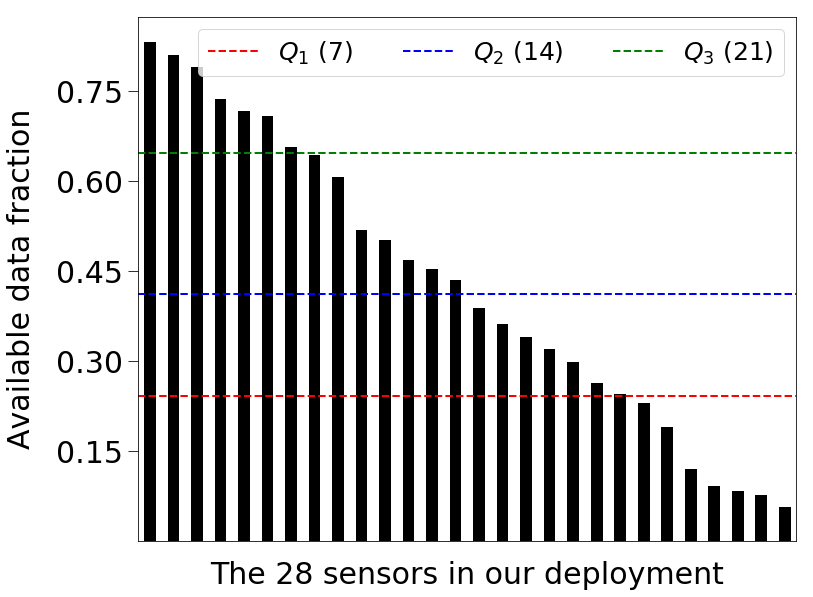

In [12]:
# display availability based on percent counts
grouped = df.groupby(level=0)
validfracs = (grouped.pm25.count() / grouped.pm25.size())
validfracs.sort_values(ascending=False, inplace=True)

pt1 = np.percentile(validfracs.values, 25)
pt2 = np.percentile(validfracs.values, 50)
pt3 = np.percentile(validfracs.values, 75)

n1 = validfracs.size // 4
n2 = 2*n1
n3 = 3*n1

plt.rc('font', size=30)
plt.rc('ps', useafm=True)
plt.rc('pdf', use14corefonts=True)

plt.figure(figsize=(12,9))
# validfracs.plot(kind='hist', bins=30)
# plt.xlim(0,1)
validfracs.plot(kind='bar', color='k', label='')
# plt.bar(validfracs.values, color='k')
xmin, xmax = plt.xlim()
plt.hlines([pt1], xmin, xmax, colors='r', linestyles='--', lw=2, label=r'$Q_1$ ({})'.format(n1))
plt.hlines([pt2], xmin, xmax, colors='b', linestyles='--', lw=2, label=r'$Q_2$ ({})'.format(n2))
plt.hlines([pt3], xmin, xmax, colors='g', linestyles='--', lw=2, label=r'$Q_3$ ({})'.format(n3))
plt.xlim(xmin, xmax)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(6, prune='both'))
plt.tick_params(length=10, pad=5, labelbottom=0, bottom=0)
plt.xlabel('The {} sensors in our deployment'.format(validfracs.size), labelpad=20)
plt.ylabel('Available data fraction', labelpad=20)
plt.legend(ncol=3, fontsize='small')
plt.tight_layout()
#plt.savefig('data/datagaps_kaiterra_fieldeggs_2019_Feb_28_bar.eps')
plt.savefig('../figures/datagaps_kaiterra_fieldeggs_{}_bar.eps'.format(suffix))
plt.show()

In [13]:
plt.close('all')